In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# df_train = pd.read_csv('Dataset/train.csv')
# df_test = pd.read_csv('Dataset/test.csv')
# df = pd.concat([df_train, df_test], sort=False)


In [4]:
# df.to_csv('Dataset/complete_dataset.csv', index=False)
# print("Data saved as complete_dataset.csv in Dataset folder.")

In [5]:
df = pd.read_csv('Dataset/complete_dataset.csv')

In [6]:
df.drop(df.columns[0], axis=1, inplace=True)

In [7]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932.0,Okwudilichukwu,668.0,France,Male,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,0.0
1,15749177.0,Okwudiliolisa,627.0,France,Male,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,0.0
2,15694510.0,Hsueh,678.0,France,Male,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,0.0
3,15741417.0,Kao,581.0,France,Male,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,0.0
4,15766172.0,Chiemenam,716.0,Spain,Male,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,0.0


In [8]:
df.shape

(302563, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302563 entries, 0 to 302562
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       301875 non-null  float64
 1   Surname          301875 non-null  object 
 2   CreditScore      301875 non-null  float64
 3   Geography        301875 non-null  object 
 4   Gender           301875 non-null  object 
 5   Age              301875 non-null  float64
 6   Tenure           301875 non-null  float64
 7   Balance          301875 non-null  float64
 8   NumOfProducts    301875 non-null  float64
 9   HasCrCard        301875 non-null  float64
 10  IsActiveMember   301875 non-null  float64
 11  EstimatedSalary  301875 non-null  float64
 12  Exited           301875 non-null  float64
dtypes: float64(10), object(3)
memory usage: 30.0+ MB


In [10]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,3.018750e+05,301875.000000,301875.000000,301875.000000,301875.000000,301875.000000,301875.000000,301875.000000,301875.000000,301875.000000
mean,1.569208e+07,656.456358,38.118940,5.011912,55421.805969,1.553494,0.753815,0.496838,112392.306565,0.188883
std,7.154290e+04,80.127598,8.858228,2.804949,62794.988725,0.545992,0.430788,0.499991,50287.998764,0.391416
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563297e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74433.430000,0.000000
50%,1.569018e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.880000,0.000000
75%,1.575690e+07,710.000000,42.000000,7.000000,119960.290000,2.000000,1.000000,1.000000,154766.915000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [11]:
df.isnull().sum()

CustomerId         688
Surname            688
CreditScore        688
Geography          688
Gender             688
Age                688
Tenure             688
Balance            688
NumOfProducts      688
HasCrCard          688
IsActiveMember     688
EstimatedSalary    688
Exited             688
dtype: int64

In [12]:
features = df.drop('Exited',axis=1)
label = df['Exited']

In [13]:
features.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15674932.0,Okwudilichukwu,668.0,France,Male,33.0,3.0,0.00,2.0,1.0,0.0,181449.97
1,15749177.0,Okwudiliolisa,627.0,France,Male,33.0,1.0,0.00,2.0,1.0,1.0,49503.50
2,15694510.0,Hsueh,678.0,France,Male,40.0,10.0,0.00,2.0,1.0,0.0,184866.69
3,15741417.0,Kao,581.0,France,Male,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88
4,15766172.0,Chiemenam,716.0,Spain,Male,33.0,5.0,0.00,2.0,1.0,1.0,15068.83


#### Distribution of numerical features

In [14]:
# List of numeric columns
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

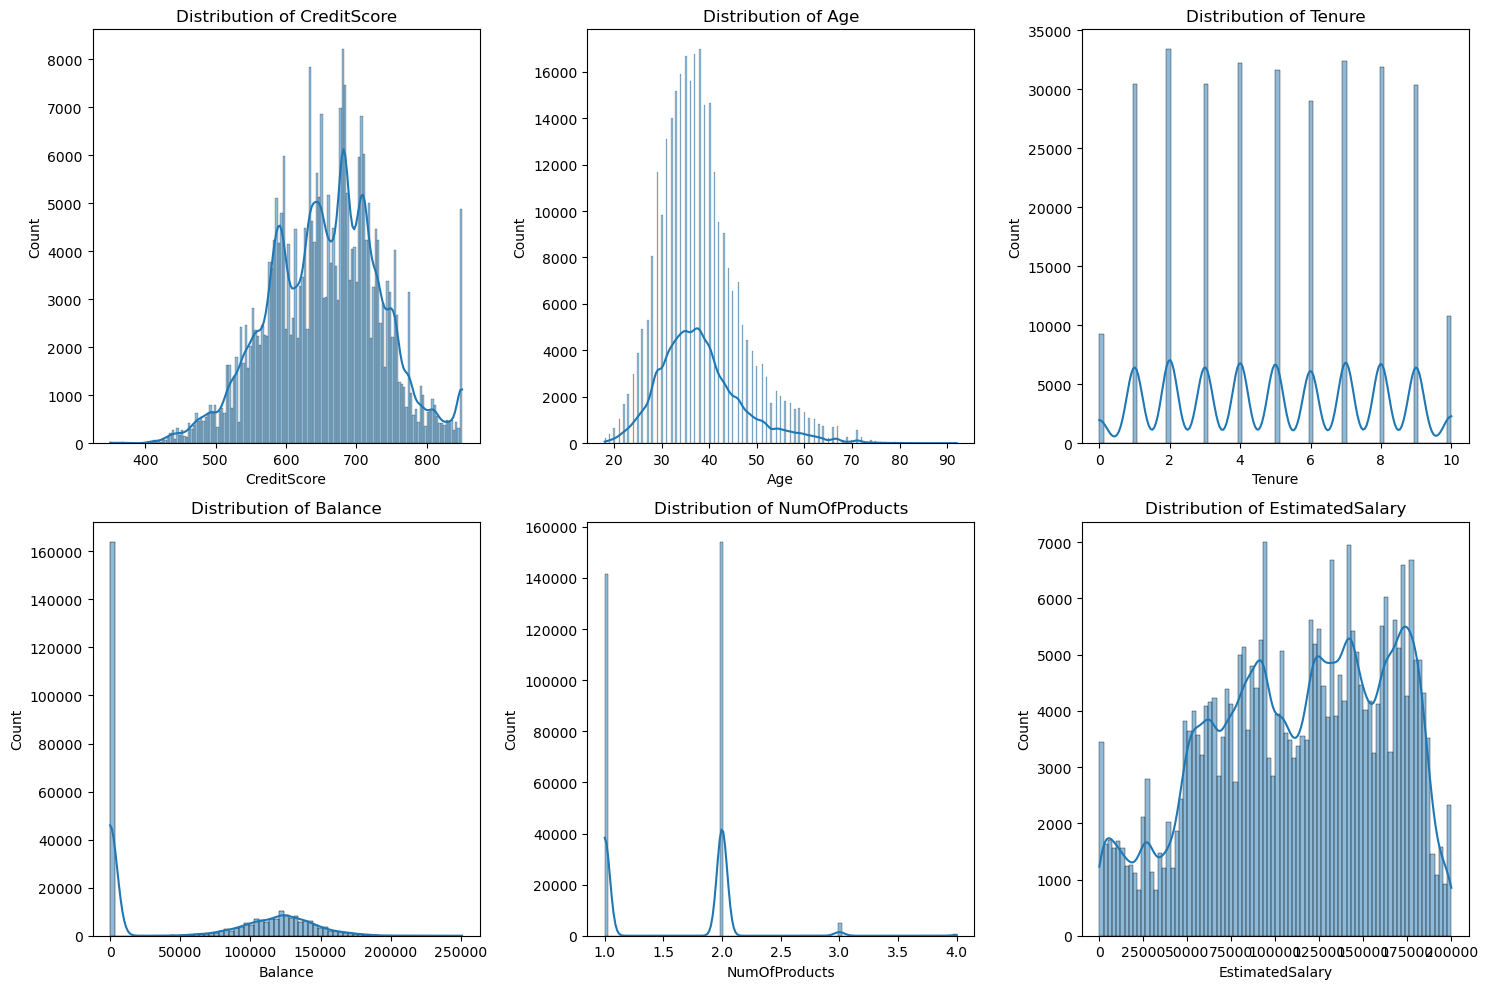

In [15]:
# histograms for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

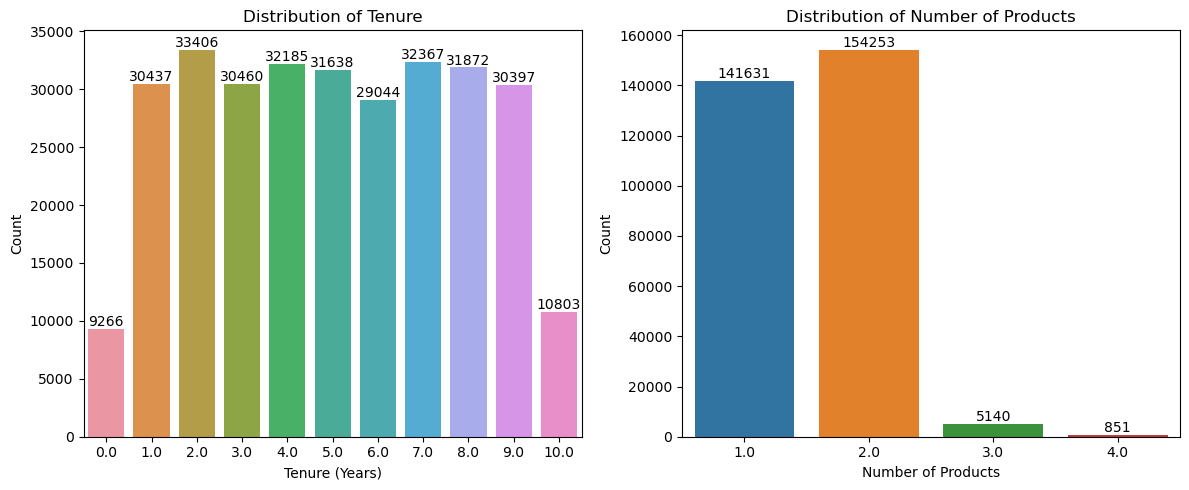

In [16]:
plt.figure(figsize=(12, 5))

# Count plot for 'Tenure'
plt.subplot(1, 2, 1)
tenure_plot =  sns.countplot(data=df, x='Tenure')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')

for p in tenure_plot.patches:
    tenure_plot.annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 5), 
                         textcoords='offset points')

# Count plot for 'NumOfProducts'
plt.subplot(1, 2, 2)
products_plot = sns.countplot(data=df, x='NumOfProducts')
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')

for p in products_plot.patches:
    products_plot.annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           xytext=(0, 5), 
                           textcoords='offset points')

plt.tight_layout()
plt.show()


#### Distribution of categorical features

In [17]:
# List of categorical columns
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

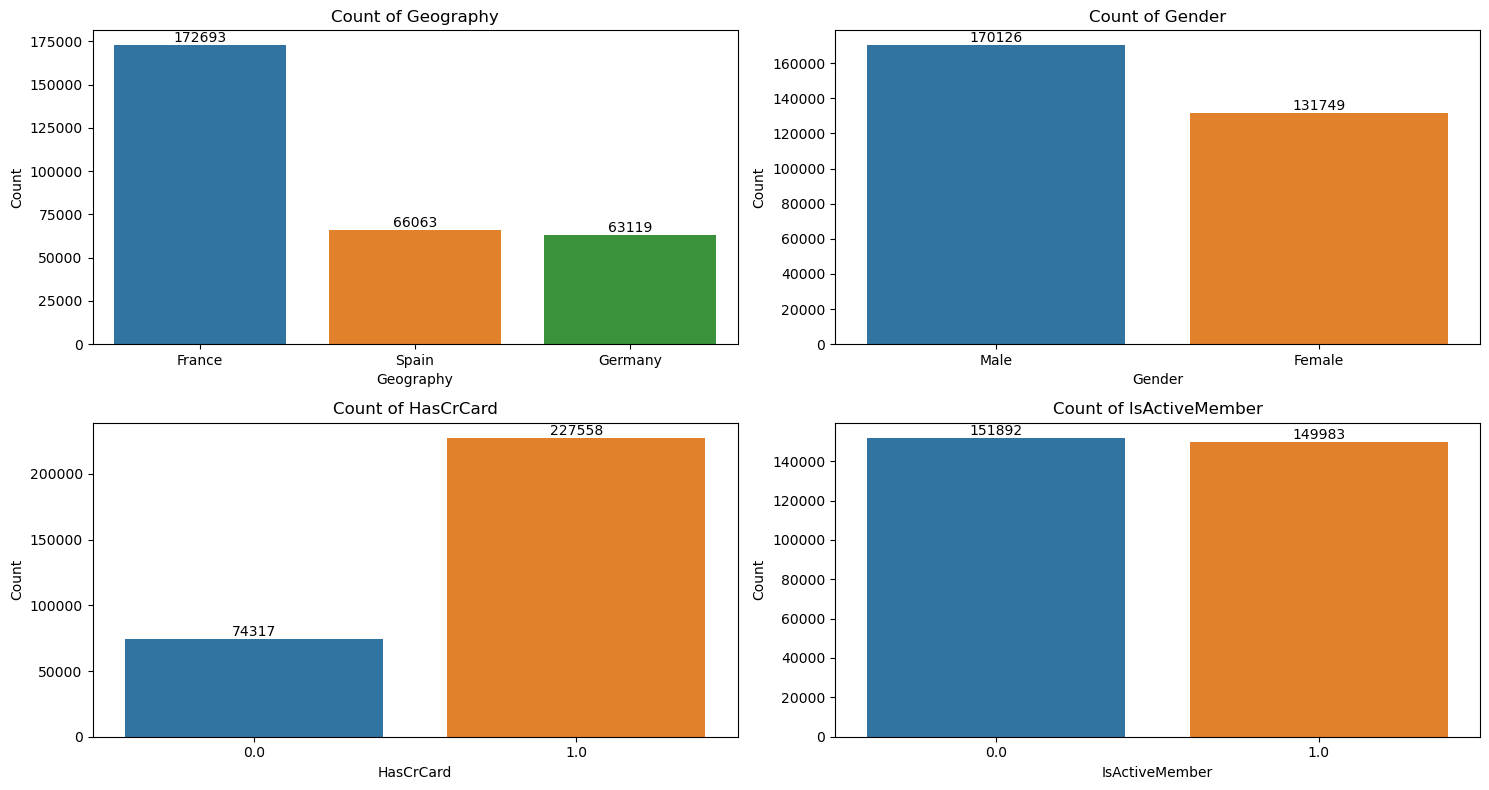

In [18]:
# bar plots for each categorical column
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    cat_plot = sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    for p in cat_plot.patches:
        cat_plot.annotate(f'{int(p.get_height())}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 5), 
                          textcoords='offset points')
plt.tight_layout()
plt.show()

#### Target Distribution

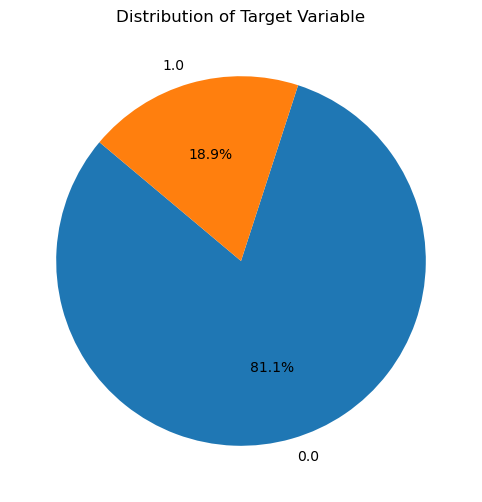

In [19]:
target_counts = df['Exited'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.show()

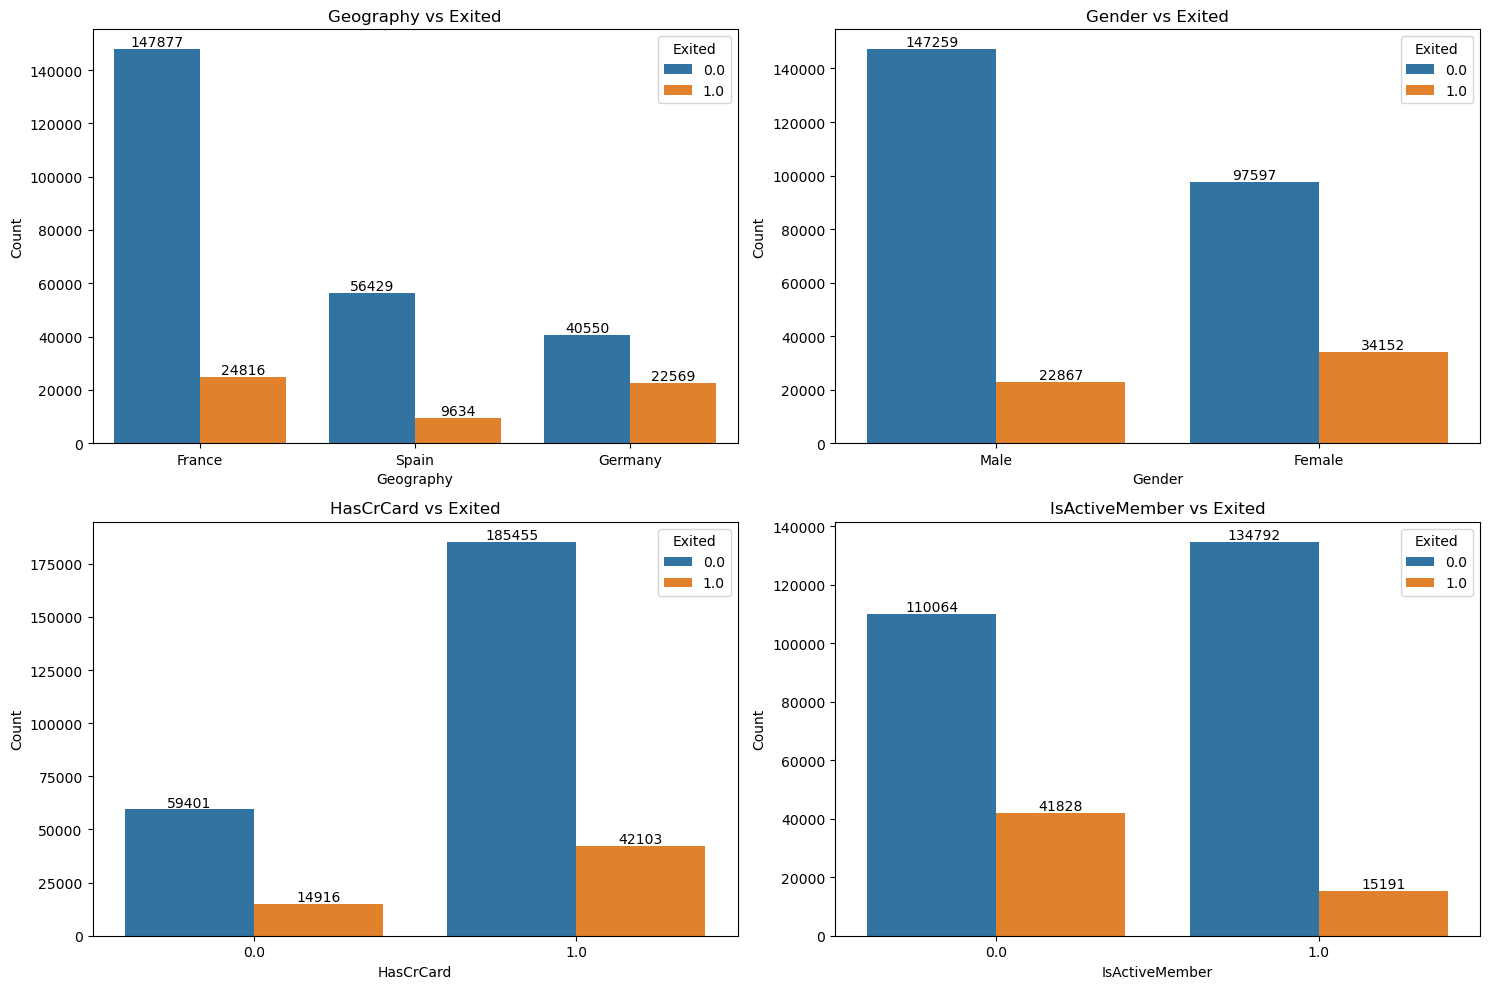

In [20]:
# categorical features against target
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    cat_plot = sns.countplot(data=df, x=col, hue='Exited')
    plt.title(f'{col} vs Exited')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    for p in cat_plot.patches:
        cat_plot.annotate(f'{int(p.get_height())}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 5), 
                          textcoords='offset points')
plt.tight_layout()
plt.show()


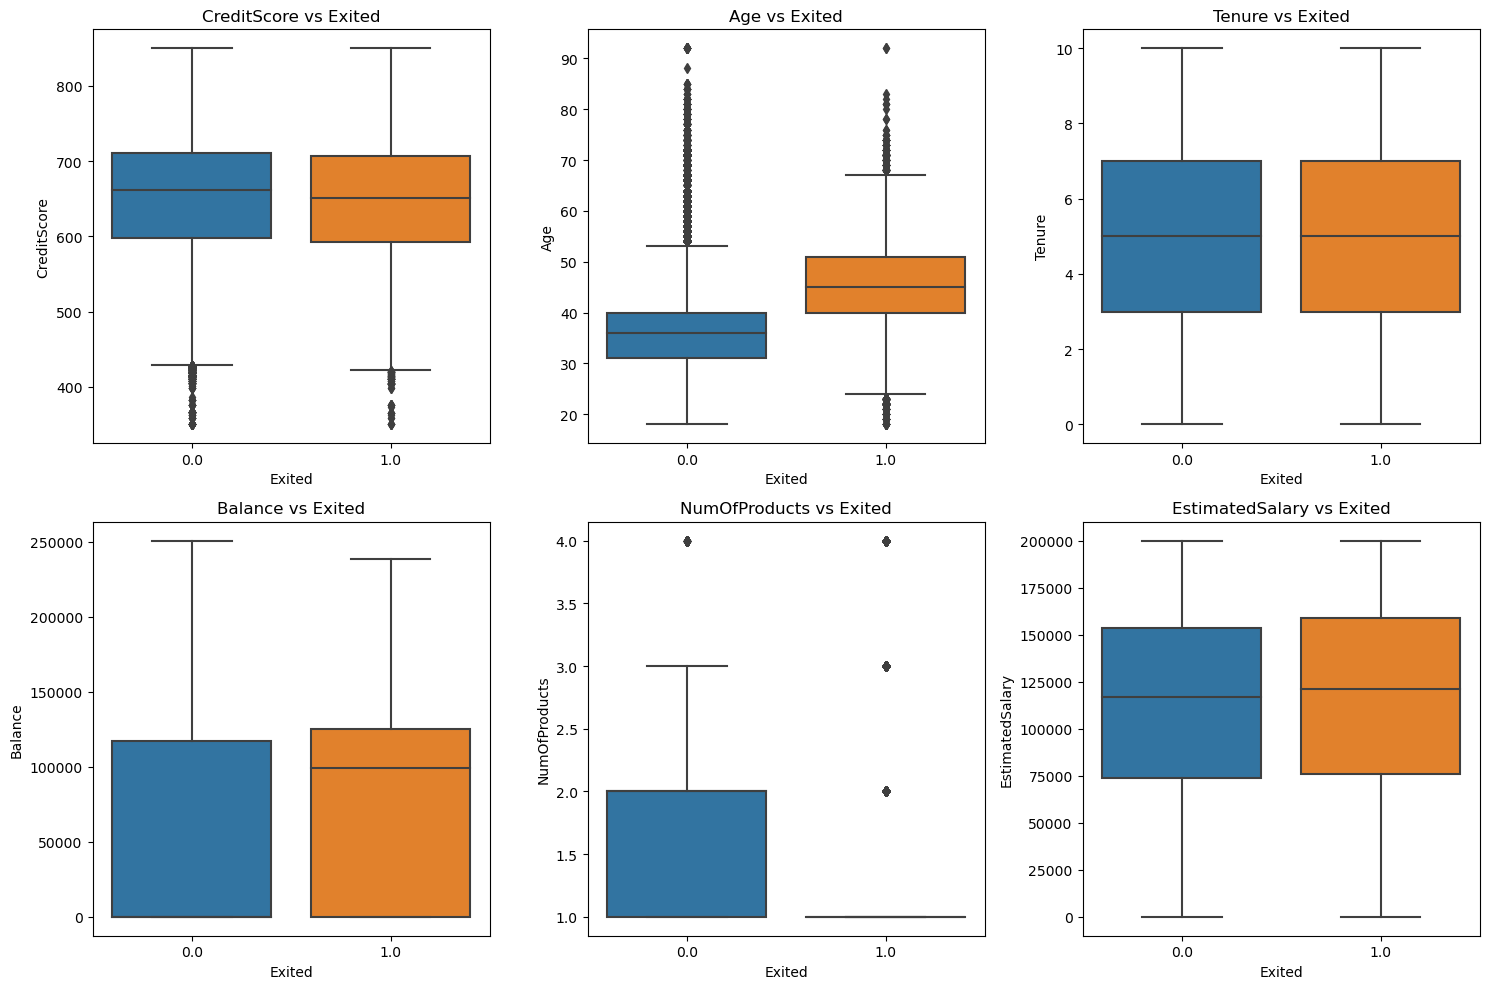

In [21]:
#box plots for numeric features against target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Exited', y=col)
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()


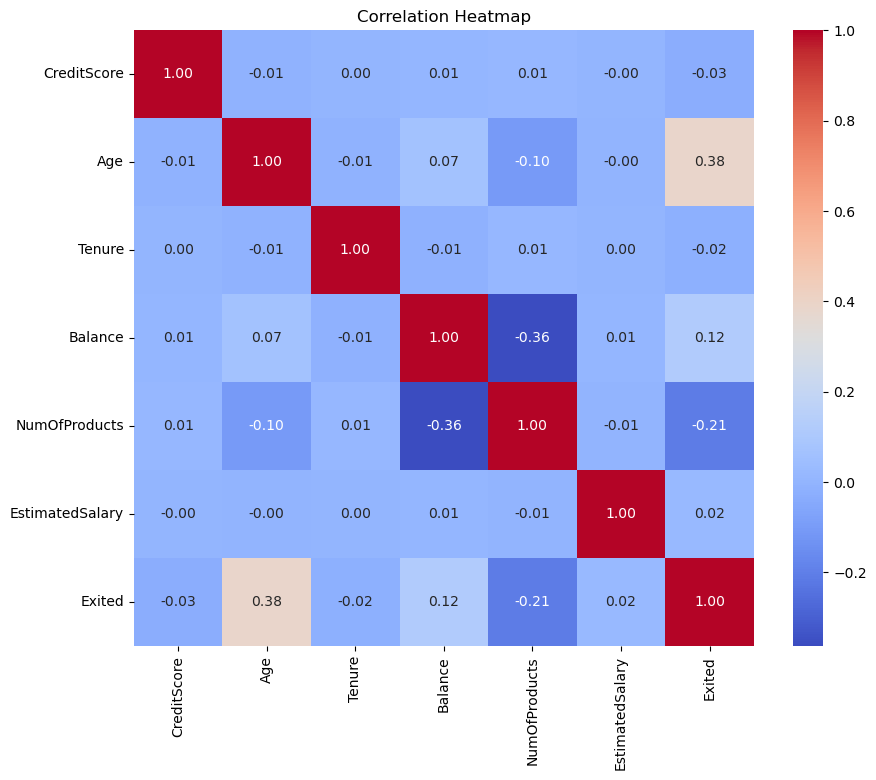

In [22]:
# correlation matrix 
correlation_matrix = df[numeric_columns + ['Exited']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
